In [3]:
# 导入必要的库
import pandas as pd
from nltk.tokenize import word_tokenize
import re

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel(r"C:\\Users\\zlm\\Desktop\\data_china.xlsx")
data.head()

In [9]:
# 选择新闻文本
texts = data['原文'].dropna().tolist()
texts

['30吨高纯食品级磷酸产品出口全球最大软饮料企业可口可乐公司、与世界最大食品制造企业雀巢公司确定长期合作关系……近日，上市公司、国内最大的精细磷化工生产企业——湖北兴发化工集团股份有限公司接连与多家世界知名食品、饮料企业开展合作，高科技食品级磷酸产品进军全球市场。专家指出，这对于我国功能性磷化工产品“高端化”具有示范意义。\n\n\u3000\u3000“与世界知名企业确立合作关系，得益于科技创新。”兴发集团董事长李国璋介绍，兴发集团始终坚持自主创新，除常规地与国内外大学、科研院所建立战略合作关系，引进、重用人才，对新产品、新技术研发项目予以重奖外，还坚持以市场为导向，研发、生产满足市场需要的产品。\n\n\u3000\u3000兴发集团总工程师李永刚介绍，食品级磷酸是国际公认的最安全和应用最广的新型食品添加剂，有助于改良食品饮料的品质以及口感，属精细磷化行业技术的“制高点”。经过可口可乐及雀巢两家跨国公司1年多的严格评审考核，兴发获得了“行业内的领先者和最佳生产基地”的评价，并与两家公司正式确定合作关系。\n\n\u3000\u3000目前，通过广泛开展产学研合作，兴发集团先后研发攻克了快速溶解性三局磷酸盐、低链长六偏磷酸钠、硬盘级次磷酸钠、低发气速度酸式焦磷酸钠等具有世界领先水平的行业共性关键技术，并成功开发了美国、欧盟、东南亚等地的用户市场。\n\n\u3000\u3000中国石油与化工工业规划院院长顾宗勤说，依靠技术自主创新，兴发集团已成为国内最大的精细磷化工生产企业、国内第一家掌握电子级磷酸生产技术的企业、世界最大的六偏磷酸钠生产企业以及亚洲最大的三聚磷酸钠生产企业。\n\n\u3000\u3000完善的技术创新体系，使得集团业绩顶住经济下行的压力逆市上扬。李国璋介绍，兴发全集团2014年实现销售收入260亿元，同比增长20％以上。\n\n\u3000\u3000拥有了105项授权专利的兴发集团，也开启了“技术输出”之旅。今年以来，兴发已与俄罗斯、哥斯达黎加、缅甸、伊朗等国的企业，就多项生产技术的使用权达成了合作协议。\n\n\u3000\u3000“兴发集团的‘创新之路’，对我国功能性磷酸及磷酸盐企业从低水平重复建设走向高端创新具有示范作用。”顾宗勤指出。',
 '华数传媒(000156)周日晚间公告称，其全资子公司浙江华数传媒资本管理有限公司与金石投

In [25]:
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zlm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# 加载自定义停用词文件
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())
    return stopwords
# 文本预处理函数
def preprocess(text, stopwords):
    # 转小写
    text = text.lower()
    # 去除标点符号、数字
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # 分词
    words = word_tokenize(text)
    # 去除停用词
    words = [word for word in words if word not in stopwords]
    return words
# 加载自定义停用词
stopwords = load_stopwords('C:\\Users\\zlm\\Desktop\\cn_stopwords.txt')  # 将此路径替换为你的停用词文件路径

# 预处理文本数据
processed_texts = [preprocess(text, stopwords) for text in texts]

processed_texts


[['吨高纯食品级磷酸产品出口全球最大软饮料企业可口可乐公司与世界最大食品制造企业雀巢公司确定长期合作关系近日上市公司国内最大的精细磷化工生产企业湖北兴发化工集团股份有限公司接连与多家世界知名食品饮料企业开展合作高科技食品级磷酸产品进军全球市场专家指出这对于我国功能性磷化工产品高端化具有示范意义',
  '与世界知名企业确立合作关系得益于科技创新兴发集团董事长李国璋介绍兴发集团始终坚持自主创新除常规地与国内外大学科研院所建立战略合作关系引进重用人才对新产品新技术研发项目予以重奖外还坚持以市场为导向研发生产满足市场需要的产品',
  '兴发集团总工程师李永刚介绍食品级磷酸是国际公认的最安全和应用最广的新型食品添加剂有助于改良食品饮料的品质以及口感属精细磷化行业技术的制高点经过可口可乐及雀巢两家跨国公司年多的严格评审考核兴发获得了行业内的领先者和最佳生产基地的评价并与两家公司正式确定合作关系',
  '目前通过广泛开展产学研合作兴发集团先后研发攻克了快速溶解性三局磷酸盐低链长六偏磷酸钠硬盘级次磷酸钠低发气速度酸式焦磷酸钠等具有世界领先水平的行业共性关键技术并成功开发了美国欧盟东南亚等地的用户市场',
  '中国石油与化工工业规划院院长顾宗勤说依靠技术自主创新兴发集团已成为国内最大的精细磷化工生产企业国内第一家掌握电子级磷酸生产技术的企业世界最大的六偏磷酸钠生产企业以及亚洲最大的三聚磷酸钠生产企业',
  '完善的技术创新体系使得集团业绩顶住经济下行的压力逆市上扬李国璋介绍兴发全集团年实现销售收入亿元同比增长以上',
  '拥有了项授权专利的兴发集团也开启了技术输出之旅今年以来兴发已与俄罗斯哥斯达黎加缅甸伊朗等国的企业就多项生产技术的使用权达成了合作协议',
  '兴发集团的创新之路对我国功能性磷酸及磷酸盐企业从低水平重复建设走向高端创新具有示范作用顾宗勤指出'],
 ['华数传媒周日晚间公告称其全资子公司浙江华数传媒资本管理有限公司与金石投资有限公司在月日签署股权转让协议华数资本以自有资金亿元收购后者转让的新疆广电网络股份有限公司股权共计万股',
  '新疆广电负责全疆有线电视网络运营在全疆各地州所在城市和主要县市共设有家分公司和家营业部年度净利润为万元年月净利润为万元',
  '公司表示此次收购新疆广电网络部分股权可进一步巩固双方平台业务资源用户及技术的全方位紧密合作

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
 
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(processed_texts)

NameError: name 'processed_texts' is not defined

In [51]:
!pip install scipy==1.7.3
from scipy.linalg import triu

# 创建字典和语料库
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.10.0rc1 Requires-Python <3.12,>=3.8; 1.10.0rc2 Requires-Python <3.12,>=3.8; 1.10.1 Requires-Python <3.12,>=3.8; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11; 1.9.0 Requires-Python >=3.8,<3.12; 1.9.0rc1 Requires-Python >=3.8,<3.12; 1.9.0rc2 Requires-Python >=3.8,<3.12; 1.9.0rc3 Requires-Python >=3.8,<3.12; 1.9.1 Requires-Python >=3.8,<3.12
ERROR: Could not find a version that satisfies the requirement scipy==1.7.3 (from versions: 

ImportError: cannot import name 'triu' from 'scipy.linalg' (F:\anaconda\Lib\site-packages\scipy\linalg\__init__.py)

In [45]:
!pip install gensim
from gensim.models import LdaMulticore
# 构建LDA模型
lda_model = LdaMulticore(corpus, num_topics=5, id2word=dictionary, workers=4)

# 展示每个主题的前10个关键词
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

ImportError: cannot import name 'triu' from 'scipy.linalg' (F:\anaconda\Lib\site-packages\scipy\linalg\__init__.py)

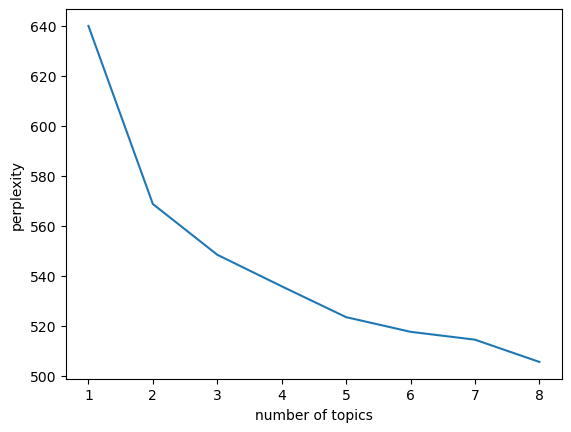

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation 
plexs = []
scores = []
n_max_topics = 10  
for i in range(1,n_max_topics):
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=666)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))
 
n_t=9 # 区间最右侧的值。
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

In [37]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7  # 设置LDA分类的主题个数
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                               random_state=666)  # 关于模型的参数,可查看官方文档
lda.fit(tf)

LatentDirichletAllocation(doc_topic_prior=0.1, learning_offset=50, max_iter=50,
                          n_components=7, random_state=666,
                          topic_word_prior=0.01)

In [39]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:" )
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword
# 输出每个主题对应词语
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
景区 游客 游玩 景点 游览 瀑布 区内 索道 峡谷 步行 乘坐 山顶 需要 公里 栈道 小时 风景 景色 进入 地方
Topic #1:
建筑 古城 历史 古镇 建于 佛教 参观 园林 皇帝 城墙 时期 始建 游客 明代 地方 年间 当年 古建 文化 寺院
Topic #2:
海洋 体验 世界 主题 项目 表演 文化 乐园 游客 动物 欢乐 互动 大型 演出 感受 游乐 科技 海底 剧场 打造
Topic #3:
度假 温泉 滑雪 旅游 休闲 体验 森林 酒店 项目 娱乐 植物 国际 度假区 乐园 冰雪 观光 玻璃 滑道 水上 雪场
Topic #4:
建筑 中心 上海 广场 特色 码头 游客 公园 城市 风情 香港 景点 美食 小吃 商业 电影 观光 欣赏 观景 影视
Topic #5:
景区 旅游 自然 公里 景观 文化 公园 风景 草原 国家 生态 风光 中国 区内 形成 森林 地质 湿地 沙滩 山水
Topic #6:
博物 文化 博物馆 动物 历史 中国 文物 艺术 展示 展览 保护 陈列 遗址 熊猫 展厅 建筑 生动 世界 动物园 国家


In [41]:
import numpy as np
topics=lda.transform(tf)
print(topics[0]) # 查看第一个景区的主题概率
topic = []
for t in topics:
    topic.append(list(t).index(np.max(t)))
data['topic']=topic
#data.to_excel("data_topic.xlsx",index=False)  # 将结果保存为Excel文件

[1.22860736e-01 6.84242966e-01 2.39225929e-02 5.00869018e-04
 5.00878685e-04 5.00834656e-04 1.67471123e-01]


In [43]:
import pyLDAvis
import pyLDAvis.lda_model
 
pyLDAvis.enable_notebook()
pic = pyLDAvis.lda_model.prepare(lda, tf, tf_vectorizer)
#pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html') # 将可视化结果打包为html文件
pyLDAvis.display(pic)
